## Resumen

El presente notebook tiene como objetivo realizar el análisis de **selección de features** para el modelo. 
El modelo a usar es **Regresión logistica** para determinar dos clases: fraude o no fraude dentro de los datos de aportes pensionales.

La muestra de datos contiene un total de **100.000** registros.
Para entrenamiento del modelo se usaran: 70.000 registros.
Para evaluación del modelo se usaran: 30.000 registros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('data.csv', sep=';', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1495, 21)
['tipo_persona', 'codigo_actividad_economica', 'tipo_identificacion', 'departamento', 'municipio', 'tarifa_pension', 'aporte_cot_obligatoria_pension', 'aporte_fsolid_pensional_solidaridad', 'aporte_fsolid_pensional_subsistencia', 'aporte_vol_afiliado', 'cot_vol_aportante', 'tarifa_salud', 'cot_obligatoria_salud', 'valor_upc_adicional', 'clase_riesgo', 'tipo_planilla', 'sexodesc', 'edad', 'tipo_cotizante', 'subtipo_cotizante', 'target']


### Encabezado

In [3]:
data.head()

,tipo_persona,codigo_actividad_economica,tipo_identificacion,departamento,municipio,tarifa_pension,aporte_cot_obligatoria_pension,aporte_fsolid_pensional_solidaridad,aporte_fsolid_pensional_subsistencia,aporte_vol_afiliado,...,tarifa_salud,cot_obligatoria_salud,valor_upc_adicional,clase_riesgo,tipo_planilla,sexodesc,edad,tipo_cotizante,subtipo_cotizante,target
0,N,7490,CC,11,1,16000,118100,0,0,0,...,12500,92300,0,0,I,FEMENINO,54,3,0,0
1,N,8299,CC,11,1,0,0,0,0,0,...,12500,92300,0,0,I,FEMENINO,74,3,3,0
2,J,125,CC,11,1,16000,118100,0,0,0,...,4000,29600,0,1,E,FEMENINO,45,1,0,0
3,N,4290,CC,63,130,16000,192000,0,0,0,...,12500,150000,0,3,I,MASCULINO,40,59,0,0
4,J,6910,CC,11,1,16000,63000,0,0,0,...,4000,15800,0,1,E,FEMENINO,49,1,0,0


### Variable objetivo

La variable objeto se llama **target** y representa fraude (cuando es 1) o no fraude (cuando es 0) en el aporte pensional.

In [4]:
data['target'].unique()

array([0, 1])

## Exploración de datos

### target

In [6]:
data['target'].value_counts()

0    1345
1     150
Name: target, dtype: int64

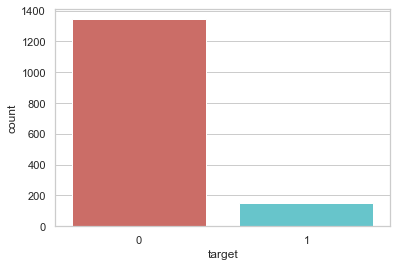

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='target', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [14]:
count_no_fraud = len(data[data['target']==0])
count_fraud = len(data[data['target']==1])
pct_of_no_fraud = count_no_fraud/(count_no_fraud+count_fraud)
pct_of_fraud = count_fraud/(count_no_fraud+count_fraud)

print("Percentage of no fraud is {}%".format(round(pct_of_no_fraud*100, 2)))
print("Percentage of fraud is {}%".format(round(pct_of_fraud*100, 2)))

Percentage of no fraud is 89.97%
Percentage of fraud is 10.03%


### Promedios agrupados por fraude-no fraude

In [17]:
data.groupby('target').mean()

,codigo_actividad_economica,departamento,municipio,tarifa_pension,aporte_cot_obligatoria_pension,aporte_fsolid_pensional_solidaridad,aporte_fsolid_pensional_subsistencia,aporte_vol_afiliado,cot_vol_aportante,tarifa_salud,cot_obligatoria_salud,valor_upc_adicional,clase_riesgo,edad,tipo_cotizante,subtipo_cotizante
target,,,,,,,,,,,,,,,,
0,5688.410409,26.87658,122.999257,12358.364312,328298.289963,7390.334572,14506.245353,0.0,0.0,7742.379182,223064.535316,733.977695,1.748699,43.828253,7.263197,0.377695
1,5950.300000,36.88000,352.206667,10346.666667,95193.333333,1138.000000,1474.666667,0.0,0.0,6786.666667,59665.333333,0.000000,1.860000,36.646667,4.220000,1.440000


#### Observaciones:

* El promedio del aporte de cotización obligatoria a pensión es 3 veces menor para los fradulentos que el aporte de los no fraudulentos. 
* El promedio del aporte a salud de los fraudulentos es 3.7 veces menor que el aporte de quienes no cometen fraude.
* El promedio de edad de los aportantes que cometen fraude es de 36.6 años.
* El promedio de edad de los aportantes que NO cometen fraude es de 43.8 años.

### Promedios agrupados por departamento

In [19]:
data.groupby('tipo_persona').mean()

,codigo_actividad_economica,departamento,municipio,tarifa_pension,aporte_cot_obligatoria_pension,aporte_fsolid_pensional_solidaridad,aporte_fsolid_pensional_subsistencia,aporte_vol_afiliado,cot_vol_aportante,tarifa_salud,cot_obligatoria_salud,valor_upc_adicional,clase_riesgo,edad,tipo_cotizante,subtipo_cotizante,target
tipo_persona,,,,,,,,,,,,,,,,,
J,5377.545855,28.595238,145.848325,12425.044092,368616.402116,8729.188713,17051.058201,0.0,0.0,7305.996473,237171.604938,0.000000,2.136684,41.076720,2.727513,0.325397,0.111993
N,6773.739612,25.634349,146.462604,11313.019391,104790.027701,586.703601,1097.506925,0.0,0.0,8716.066482,110855.955679,2734.626039,0.576177,49.487535,20.246537,0.983380,0.063712


#### Observaciones

* La mayoria de fraude se concentra en los tipos de de persona **Juridica**
* El promedio de edad de la persona Juridica es de 41 años. Mientras que para Natural es de 49.4 años.
* El aporte obligatorio a pensión de las personas Juridicas es 3.5 veces mayor al aporte de las personas naturales.

### Promedios agrupados por género

In [21]:
data.groupby('sexodesc').mean()

,codigo_actividad_economica,departamento,municipio,tarifa_pension,aporte_cot_obligatoria_pension,aporte_fsolid_pensional_solidaridad,aporte_fsolid_pensional_subsistencia,aporte_vol_afiliado,cot_vol_aportante,tarifa_salud,cot_obligatoria_salud,valor_upc_adicional,clase_riesgo,edad,tipo_cotizante,subtipo_cotizante,target
sexodesc,,,,,,,,,,,,,,,,,
FEMENINO,5994.949254,21.431343,134.117910,12089.552239,322498.208955,7774.179104,15051.791045,0.0,0.0,8088.805970,239310.298507,921.044776,1.202985,42.582090,8.428358,0.485075,0.094030
MASCULINO,5487.080000,33.117576,155.643636,12210.909091,290625.939394,5941.818182,11693.818182,0.0,0.0,7287.272727,180162.060606,448.606061,2.212121,43.534545,5.763636,0.483636,0.105455


#### Observaciones:

* El promedio del valor de la pensión obligatoria para Mujeres es de **322.498** mientras que para los Hombres es de **290.625**
* El promedio de edad de las mujeres aportantes es de **42.5 años**, mientras que para los hombres es de **43.5 años**.

## Visualizaciones

### ► tipo_persona •

Text(0, 0.5, 'Frecuencia de fraude')

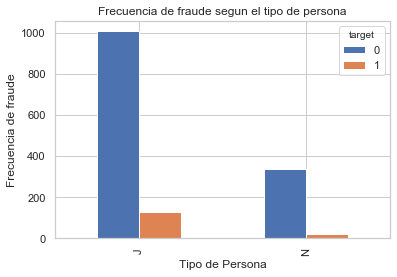

In [23]:
%matplotlib inline
pd.crosstab(data.tipo_persona,data.target).plot(kind='bar')
plt.title('Frecuencia de fraude segun el tipo de persona')
plt.xlabel('Tipo de Persona')
plt.ylabel('Frecuencia de fraude')

#### Observaciones:

* Hay influencia positiva y negativa en lo niveles de fraude segun el tipo de persona.
* El tipo de persona puede ser un buen predictor de fraude.

### ► codigo_actividad_economica •

In [31]:
len(list(data.codigo_actividad_economica.unique()))

142

Text(0, 0.5, 'Proporción Fraude')

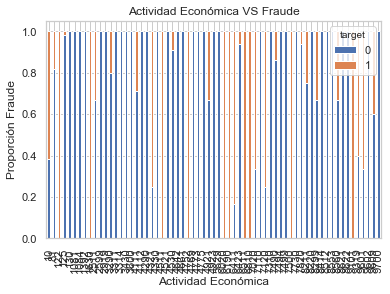

In [42]:
%matplotlib inline
table = pd.crosstab(data.codigo_actividad_economica[1000:], data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Actividad Económica VS Fraude')
plt.xlabel('Actividad Económica')
plt.ylabel('Proporción Fraude')

#### Observaciones:

* La actividad económica influye en en fraude.
* Puede ser un buen predictor.

### ► tipo_identificacion

Text(0, 0.5, 'Frecuencia de fraude')

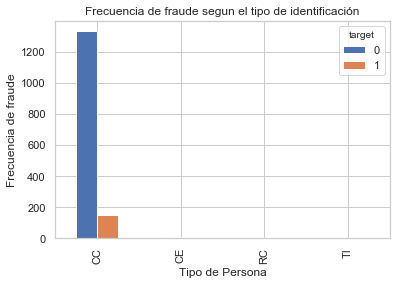

In [43]:
%matplotlib inline
pd.crosstab(data.tipo_identificacion, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude segun el tipo de identificación')
plt.xlabel('Tipo de Persona')
plt.ylabel('Frecuencia de fraude')

In [46]:
data['tipo_identificacion'].value_counts()

CC    1483
CE       6
TI       4
RC       2
Name: tipo_identificacion, dtype: int64

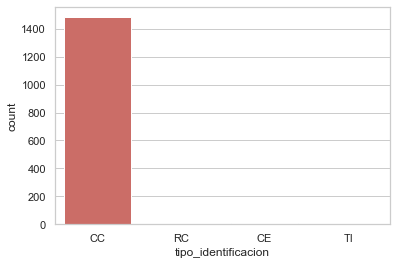

<Figure size 432x288 with 0 Axes>

In [44]:
sns.countplot(x='tipo_identificacion', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

#### Observaciones:

* 12 registros de aporte pensional no son CC.
* Parece ser que **Tipo de Identificación** no es un buen predictor. Se puede ignorar este feature para que no ingrese al modelo.

### ► Departamento y Municipio

In [53]:
print("Hay {} departamentos.".format(len(list(data.departamento.unique()))))

Hay 29 departamentos.


Text(0, 0.5, 'Frecuencia de fraude')

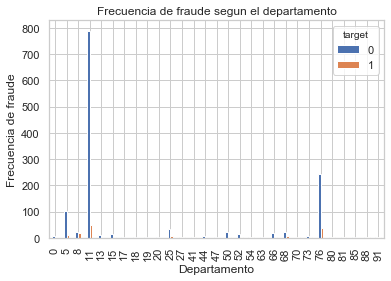

In [55]:
%matplotlib inline
pd.crosstab(data.departamento, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude segun el departamento')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia de fraude')

#### Observaciones:

* El departamento no tiene influencia o relación directa con el fraude.
* Los departamento con mayor fraude son el 11, 76 y 5.

### ► tarifa_pension

Text(0, 0.5, 'Frecuencia de fraude')

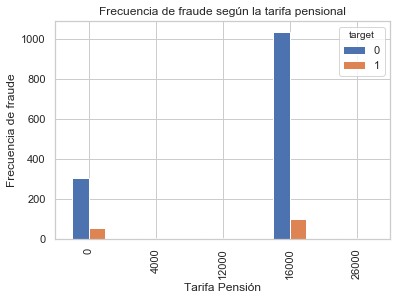

In [62]:
pd.crosstab(data.tarifa_pension, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según la tarifa pensional')
plt.xlabel('Tarifa Pensión')
plt.ylabel('Frecuencia de fraude')

#### Observaciones:

* El fraude y no fraude se concentran en las tarifas con valor **0** y **16.000**
* Parace que no es un buen predictor.

In [65]:
data['tarifa_pension'].value_counts()

16000    1133
0         358
4000        2
12000       1
26000       1
Name: tarifa_pension, dtype: int64

### ► aporte_cot_obligatoria_pension

Text(0, 0.5, 'Frecuencia de fraude')

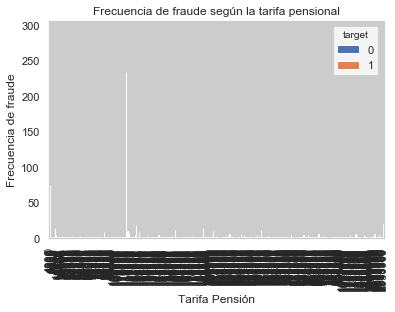

In [70]:
pd.crosstab(data.aporte_cot_obligatoria_pension, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según la tarifa pensional')
plt.xlabel('Tarifa Pensión')
plt.ylabel('Frecuencia de fraude')

#### Observaciones:

* No hay relación clara del aporte obligatorio a pensión con el fraude o no fraude.
* No es un buen predictor. Se descartará del input del modelo.

### ► aporte_fsolid_pensional_solidaridad

In [71]:
data['aporte_fsolid_pensional_solidaridad'].value_counts()

0        1234
92300      20
20200       7
74400       6
43600       6
         ... 
5500        1
7600        1
19900       1
5600        1
23600       1
Name: aporte_fsolid_pensional_solidaridad, Length: 161, dtype: int64

Text(0, 0.5, 'Frecuencia de Fraude')

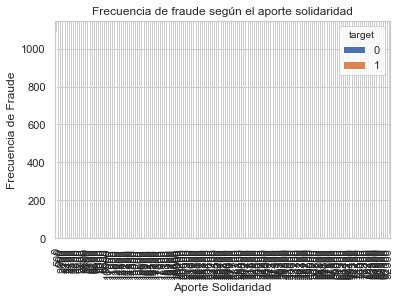

In [74]:
pd.crosstab(data.aporte_fsolid_pensional_solidaridad, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según el aporte solidaridad')
plt.xlabel('Aporte Solidaridad')
plt.ylabel('Frecuencia de Fraude')

#### Observaciones:

* El aporte de solidaridad no tiene influencia en el fraude.
* El aporte de solidaridad no es un buen predictor del fraude.

### ► clase_riesgo •

Text(0, 0.5, 'Frecuencia de Fraude')

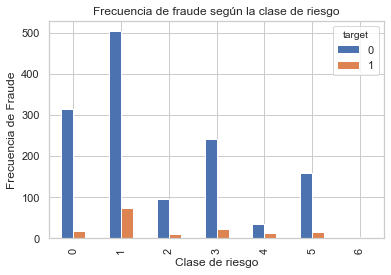

In [77]:
pd.crosstab(data.clase_riesgo, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según la clase de riesgo')
plt.xlabel('Clase de riesgo')
plt.ylabel('Frecuencia de Fraude')

* La clase de riesgo puede ser un buen predictor del fraude.
* La mayor cantidad de fraude se presenta en la clase de riesgo 1.

### ► tipo_planilla •

Text(0, 0.5, 'Frecuencia de Fraude')

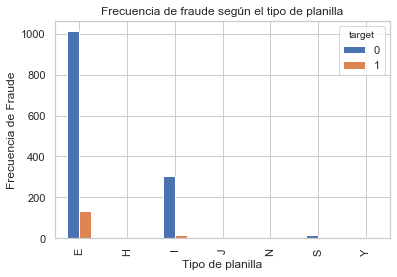

In [4]:
pd.crosstab(data.tipo_planilla, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según el tipo de planilla')
plt.xlabel('Tipo de planilla')
plt.ylabel('Frecuencia de Fraude')

In [79]:
data['tipo_planilla'].value_counts()

E    1143
I     322
S      19
Y       6
N       2
H       2
J       1
Name: tipo_planilla, dtype: int64

#### Observaciones:

* El fraude se concentra en el uso de los tipos de planilla **E** e **I**
* Puede ser un buen predictor del fraude.

### ► sexodesc

Text(0, 0.5, 'Frecuencia de Fraude')

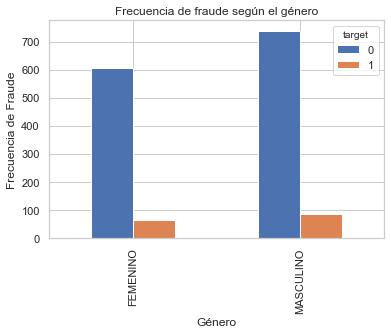

In [5]:
pd.crosstab(data.sexodesc, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según el género')
plt.xlabel('Género')
plt.ylabel('Frecuencia de Fraude')

#### Observaciones:

* el género no es un buen predictor del fraude.

### ► edad •

Text(0, 0.5, 'Frecuencia de Fraude')

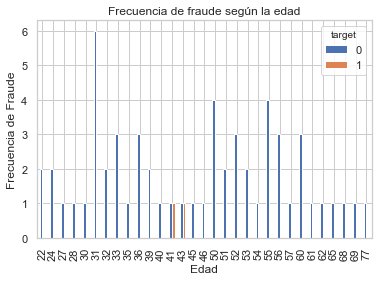

In [93]:
pd.crosstab(data.edad[20:80], data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de Fraude')

Text(0, 0.5, 'Frecuencia fraude')

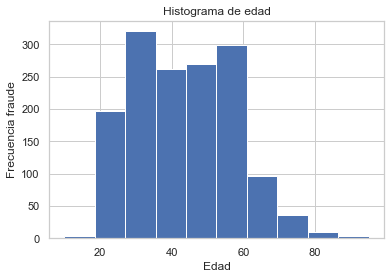

In [89]:
data.edad.hist()
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia fraude')

#### Observaciones:

* La mayoria de edades estan en el rango de 20 a 60 años.
* El fraude se concentra en las edades entre 40 y 45 años.
* Parece ser un buen predictor de fraude.

### ► tipo_cotizante •

Text(0, 0.5, 'Frecuencia de Fraude')

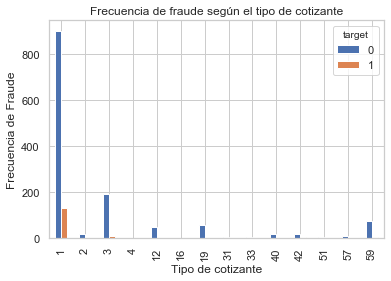

In [94]:
pd.crosstab(data.tipo_cotizante, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según el tipo de cotizante')
plt.xlabel('Tipo de cotizante')
plt.ylabel('Frecuencia de Fraude')

#### Observaciones:

* El tipo de cotizante parace ser un buen predictor de fraude.

### ► subtipo_cotizante •

Text(0, 0.5, 'Frecuencia de Fraude')

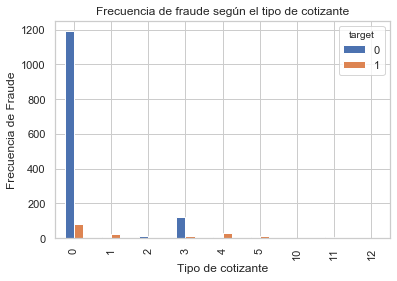

In [95]:
pd.crosstab(data.subtipo_cotizante, data.target).plot(kind='bar')
plt.title('Frecuencia de fraude según el tipo de cotizante')
plt.xlabel('Tipo de cotizante')
plt.ylabel('Frecuencia de Fraude')

#### Observaciones:

* El subtipo de cotizante parace ser un buen predictor de fraude.

## ✓ Variables finales

* tipo_persona
* codigo_actividad_economica
* subtipo_cotizante
* tipo_cotizante
* edad
* tipo_planilla
* clase_riesgo

## ✘ Variables desechadas

* tipo_identificacion
* departamento
* municipio
* tarifa_pension
* aporte_cot_obligatoria_pension
* aporte_fsolid_pensional_solidaridad
* aporte_fsolid_pensional_subsistencia
* aporte_vol_afiliado
* cot_vol_aportante
* tarifa_salud
* cot_obligatoria_salud
* valor_upc_adicional
* sexodesc

### 📌  Importante

* Los datos No se encuentran balanceados. el balance es de **9 a 1**. Y no es apropiado entrenar el modelo con los datos así ya que el **rendimiento del modelo** se verá afectado y ya que nuestro objetivo está en detectar la clase minoritaria entonces, será necesaria balancear los datos.

* Para balancear los datos se usará la tecnica de **sobre-muestreo aleatorio con reemplazo** para nivelar las clases aumentando los puntos de datos de la clase minoritaria que en este caso es la **clase de fraude.**